In [1]:
import igraph            as ig
import matplotlib.pyplot as plt
import pandas            as pd
import math
from  matplotlib.colors import LinearSegmentedColormap

In [2]:
# CARICAMENTO RETE
zachary = ig.Graph.Famous('Zachary')

## BETWEENNES MEASUREMENT

In [3]:
#MISURARE CENTRALITA' BETWEENESS
zachary_betwenness = zachary.betweenness()

# STAMPIAMO QUALI SONO I 5 NODI CON BETWEENNES PIÙ ALTA
zachary_betw_dict  = [{
    "NODE_ID"    : id_n,
    "BETWEENNES" : btw 
    } for id_n, btw in enumerate(zachary_betwenness)
]
zachary_betwenness_df = pd.DataFrame(zachary_betw_dict)
zachary_betwenness_df = zachary_betwenness_df.sort_values(by="BETWEENNES", ascending=False)

zachary_betwenness_df.head(5)

,NODE_ID,BETWEENNES
0,0,231.071429
33,33,160.551587
32,32,76.690476
2,2,75.850794
31,31,73.009524


## PAGE RANK MEASUREMENT

In [26]:
zachary_pagerank  = zachary.pagerank()
zachary_pgrk_dict = [{
    "NODE_ID"    : id_n,
    "PAGERANK"   : pgk 
    } for id_n, pgk in enumerate(zachary_pagerank)
]

zachary_pagerank = pd.DataFrame(zachary_pgrk_dict)
zachary_pagerank = zachary_pagerank.sort_values(by="PAGERANK", ascending=False)

zachary_pagerank.head(5)

,NODE_ID,PAGERANK
33,33,0.100919
0,0,0.096997
32,32,0.071693
2,2,0.057079
1,1,0.052877


## CLIQUES

Ritorna le piu' grandi cliques del grafo.

In [33]:
num_cliques        = zachary.clique_number()
zachary_lrgcliques = zachary.largest_cliques()

print("NUMERO CLIQUES:", num_cliques)
print("NUMERO CLIQUES MASSIMALI:", len(zachary_lrgcliques))
for i, big_clique in enumerate(zachary_lrgcliques):
    print(" -NUMERO NODI DELLA CLICQUE {i}:".format(i=i), len(big_clique))

NUMERO CLIQUES: 5
NUMERO CLIQUES MASSIMALI: 2
 -NUMERO NODI DELLA CLICQUE 0: 5
 -NUMERO NODI DELLA CLICQUE 1: 5


## PLOTTIAMO LE CLIQUES

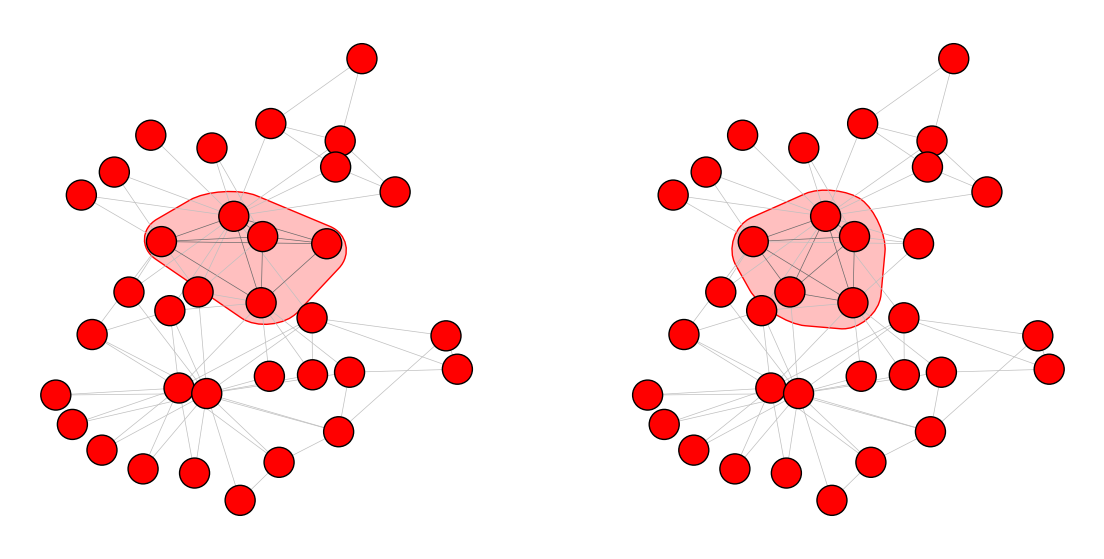

In [43]:
fig, axs = plt.subplots(1, 2, figsize = (14, 7))

for clique, ax in zip(zachary_lrgcliques, axs):
    ig.plot(
        ig.VertexCover(g, [clique]),
        mark_groups=True,
        edge_width=0.5,palette=ig.RainbowPalette(),
        target=ax,
    )
plt.show()

## CONTIAMO IL NUMERO DI TRIANGOLO

In [45]:
zachary_triangoli = zachary.cliques(min=3, max=3)
print("NUMERO DI TRIANGOLI: ", len(zachary_triangoli))

NUMERO DI TRIANGOLI:  45


## STAMPIAMO SULLA BASE DELLA CENTRALITÀ

 - Per comodità di visualizzazione calcoliamo il log2 della beteenness incrementata di 2 (problemi con i valori 0.0), e poi eleviamo per 1.8
 - attribuiamo etichetta solo ai top 5 nodi con betwenness alta
 - coloriamo i nodi dal verde al rosso sulla base della betweennes

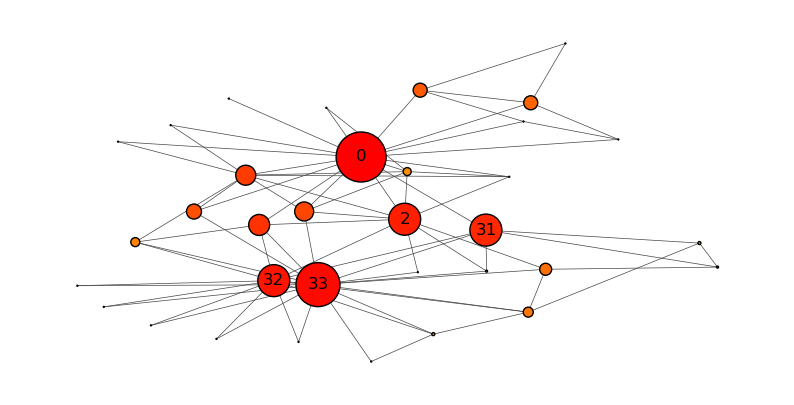

In [111]:
tbtw               = zachary_betwenness_df.head(5).NODE_ID.to_list()
zachary.vs["size"] = [math.log2(btw + 2)**1.9 for btw in zachary_betwenness]
zachary.vs[tbtw]["label"] = [str(label) for label in tbtw]
cmap = ig.AdvancedGradientPalette(["red","orange","green"], n=34)
zachary.vs[zachary_betwenness_df.NODE_ID.to_list()]["color"] = cmap
# PLOT
fig, ax = plt.subplots(figsize=(10,5))
ig.plot(
   zachary, 
   target = ax,
   edge_width=0.5,
   palette=cmap
)
plt.show()